# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [97]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [98]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv", decimal=',')  # Use "decimal" option to convert 'Experience' values to float (e.g: 1,5 -> 1.5)

# Since we will fill null values for the 'Experience' column, It's better to have a copy from the original dataset for Q4 and Q5
df_quests4_5 = df.copy()  

In [99]:
# Get an idea about the dataset 
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

<font color='Blackred'> -> From the previous result, we can know that we have 9582 observations</font>

In [100]:
# Use isna() prebuilt function to know how many null iteration for each column
df.isna().sum()  

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64

<font color='Blackred'>-> It gives us an idea that we have 17 'Entreprise' missing values, 19 'Metier' that we will use for the prediction, and 94 missing 'Experience' </font>

### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [101]:
# Retrieve data scientist & data engineers to adjust code "kinda more proper"
df_scientists = df[df['Metier'] == "Data scientist"]
df_engineers = df[df['Metier'] == "Data engineer"]

# Apply median to data scientists & average to data engineers 'Experience' values

df.loc[df['Metier'] == "Data scientist"] = df_scientists.fillna(df_scientists['Experience'].median())
df.loc[df['Metier'] == "Data engineer"] = df_engineers.fillna(df_engineers['Experience'].mean())

In [102]:
# Check that missing 'Experience' values are filled
df.isna().sum() 

Entreprise       8
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64

<font color='Blackred'> -> We assume that the null values are for the other type of Jobs 'Lead data scientist' and 'Data architect'</font>

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne? 

<font color='red'>Pay attention: <font color='Blackred'> This is a bit tricky question !
Should we calculate the year experience before filling null values or after? 

-> For a better understanding, we should use the previous values before filling the null values so we can have 'ground truth' since we give more importance to the data collected </font>

In [103]:
lead_data_scientist_exp_moy = df_quests4_5[df_quests4_5['Metier']=="Lead data scientist"]['Experience'].mean()
data_engineer_exp_moy = df_quests4_5[df_quests4_5['Metier']=="Data engineer"]['Experience'].mean()
data_scientist_exp_moy = df_quests4_5[df_quests4_5['Metier']=="Data scientist"]['Experience'].mean()

print('Average experience for Lead data scientists {:2.2} years\n' \
      'Average experience for Data scientists {:2.2} years\n'\
      'Average experience for Data engineers {:2.2} years\n'\
      .format(lead_data_scientist_exp_moy, data_engineer_exp_moy, data_scientist_exp_moy))


Average experience for Lead data scientists 4.0 years
Average experience for Data scientists 3.0 years
Average experience for Data engineers 2.2 years



<font color='Blackred'> -> In general, we need to have more years experience to be a 'Tech lead' which it makes 4 years as average for Lead data scientists as an obious info </font>

### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

In [104]:
# Calculate the average experience for the last job which it's "Data architecte"
data_architect_exp_moy = df_quests4_5[df_quests4_5['Metier']=="Data architecte"]['Experience'].mean()

print('Average experience for Data architects {:2.2} years'.format(data_architect_exp_moy))

Average experience for Data architects 3.0 years


In [105]:
# To have a better visualization we will store our values in a pandas DataFrame
avg_exp_data_visu = pd.DataFrame({'Metier':['Data architecte','Data engineer','Data scientist','Lead data scientist']\
                                  ,'Experience moyenne':\
                                  [data_architect_exp_moy, data_engineer_exp_moy, data_scientist_exp_moy, lead_data_scientist_exp_moy]})

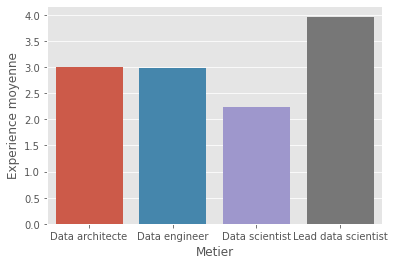

In [106]:
ax = sb.barplot(x="Metier", y="Experience moyenne", data=avg_exp_data_visu)

<font color='Blackred'> -> From this visualization, we can see that Data scientists has less average experience so we might say is it due to the conversion to Lead data scientists? </font> 

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [107]:
def transform_exp(x):
  '''
    Experience modalities are based on famous forums threads 'Reddit, Quora, Medium'
    Debutant: Less than a year 'Junior profil'
    Confirmé: From a year to three
    Avancé:   The profil is more fluent with the job from job missions 3 years to 6
    Expert:   It's a senior modality and the profil has finished all previous steps
  '''
  Exp_label = 'expert'
  if (x <= 1):
    Exp_label = 'debutant'

  elif (x >= 1 and x <= 3):
    Exp_label = 'confirmé'

  elif (x >= 3 and x <= 6):
    Exp_label = 'avancé'

  return Exp_label

In [108]:
df['Experience'] = df['Experience'].apply(transform_exp)
df.rename(columns={"Experience": "Exp_label"}, inplace=True)

In [109]:
df.head()

,Entreprise,Metier,Technologies,Diplome,Exp_label,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,debutant,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,confirmé,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,confirmé,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,confirmé,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,confirmé,Bordeaux


### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [110]:
def split_technos(x):
  '''
    A simple RegEx to get rid of slash since in the 'Technologies' column all technos are between slashes
  '''
  return re.findall('([^/]+)', x)

In [111]:
techno_values = df['Technologies'].apply(split_technos)
techno_values

0       [Matlab, Python, Pyspark, Scikit-learn, Tensor...
1                          [Python, Java, Scala, MongoDB]
2       [SPSS, SQL, Teradata, R, Python, Tensorflow, s...
3                                  [C, C++, Java, Python]
4       [Matlab, Python, C++, numpy, Tensorflow, sciki...
                              ...                        
9577                 [C++, R, Python, Matlab, Matplotlib]
9578    [Excel, Python, Matlab, R, machine learning, a...
9579                    [R, machine learning, Excel, VBA]
9580    [Python, Pyspark, machine learning, Microsoft ...
9581                              [VBA, Python, Excel, R]
Name: Technologies, Length: 9582, dtype: object

In [112]:
# Since we are able to retrieve our values, we have to store them in a list so we can calculate their iterations
technos_list = list()
for iter_techno in techno_values:
  for tech_value in iter_techno:
    technos_list.append(tech_value)

# Now we have our values stored in the technos_list, let's put them on a dataframe so we can have use of value_counts() func.
popular_technos = pd.DataFrame({'Technologies': technos_list})

# Let's get the value count of each techno, but since we only need the most five used ones, we will take the 5 first one
technos_five_popular = popular_technos['Technologies'].value_counts()[:5]
technos_five_popular

Python    6627
R         4374
SQL       2581
Java      1719
Hadoop    1589
Name: Technologies, dtype: int64

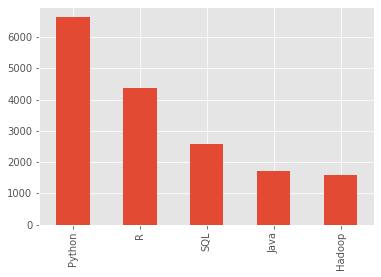

In [113]:
technos_five_popular.plot(kind="bar")

<font color='Blackred'> -> This representation doesn't shock anyone since Python is the mos tused programming language in the data field, R is more a statistical programming language. But Python has a big value since it has a big community and a lot of libraries for data science projects. 

Java is more an old industrialized programming language and can still be used for some data engineering tasks (even tho we see more of Go, scala,..)</font> 

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [114]:
# For predictions, and creating different cluster we will use a copy of our dataframe 
df_clust = df.copy()
df_clust['Technologies'] = df_clust['Technologies'].apply(split_technos)


Let's plot the data

In [115]:
# Since most columns have string values we will use the LabelEncoder func to transofrm those categorical values to a numerical ones so they can be treated with Kmeans algo
le = sk.preprocessing.LabelEncoder()

df_clust = df_clust.astype(str).apply(le.fit_transform)

# Let's take a look on our new numerical dataframe
df_clust.head()

,Entreprise,Metier,Technologies,Diplome,Exp_label,Ville
0,1077,2,27,1,2,8
1,799,0,34,1,1,4
2,403,3,51,1,1,6
3,101,2,2,1,1,4
4,122,2,26,3,1,0


In [138]:
# Fitting K-Means to our new dataset
kmeans = sk.cluster.KMeans(n_clusters = 2, init = 'k-means++', random_state = 42) # we will use two clusters to answer our question
labels = kmeans.fit_predict(df_clust)
print(labels)


[1 1 0 ... 0 1 1]


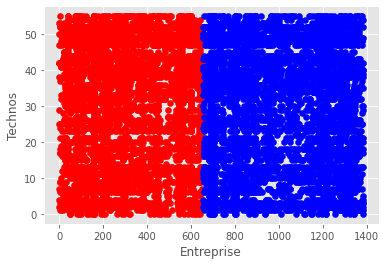

In [117]:
# Now, let's have a look on our two cluster 

# filter rows of original data 
filtered_label0 = df_clust[labels == 0]
 
filtered_label1 = df_clust[labels == 1]
 
# Plotting the results
plt.scatter(filtered_label0.iloc[:, 0] , filtered_label0.iloc[:,2] , color = 'red')
plt.scatter(filtered_label1.iloc[:, 0] , filtered_label1.iloc[:,2] , color = 'blue')
plt.xlabel('Entreprise')
plt.ylabel('Technos')
plt.show()

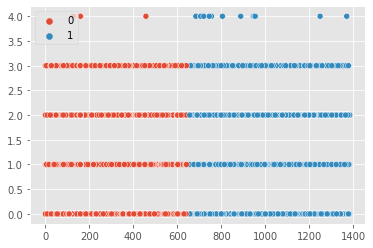

In [118]:
# Second approach to visualize clusters with seaborn
X_visu = df_clust.to_numpy()
sb.scatterplot(x=X_visu[:,0], y=X_visu[:,1], hue=labels)


<font color='Blackred'> -> It appears, that we managed to have two clusters.
But was our method efficient? Let's verify that with an evaluation method </font> 

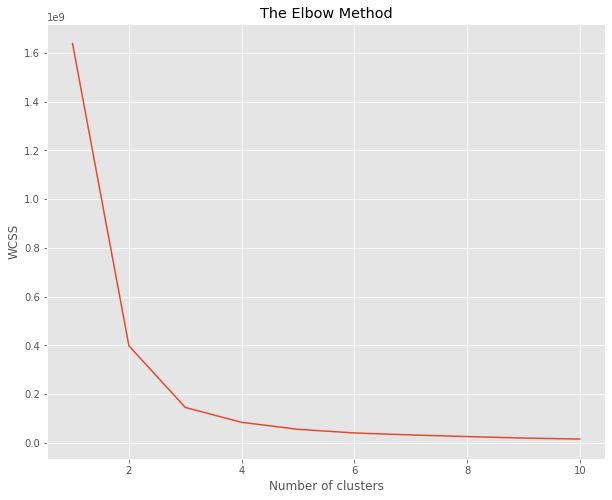

In [141]:
# Evaluating Kmeans with the Elbow Method 

# Let's find the appropriate cluster number
plt.figure(figsize=(10, 8))

wcss = []
for i in range(1, 11):
    kmeans_elbow = sk.cluster.KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_elbow.fit(df_clust)
    wcss.append(kmeans_elbow.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

<font color='Blackred'> -> We clearly see that after 4 clusters, our wcs (Whthin Cluster sum) value doesn't change and it's constant which make us get an info that 4 clusters is the optimal choice to separate our data.

We can just agree with that, because in our dataset we know that we have 4 different job titles. </font> 

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

In [120]:
'''
  Silhouette Coefficient
  This score is between -1 and 1, where the higher the score the more well defined and distinct your clusters are.
  {ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score}
'''
# Before predicting our missing job titles, let's evaluate our algo with 'silhouette_score' metric
print('Is our algo optimal? Did we manage to have a good cluster model?\n -> Result : {:2.2}'\
      .format(sk.metrics.silhouette_score(df_clust, labels)))


Is our algo optimal? Did we manage to have a good cluster model?
 -> Result : 0.63


In [128]:
# Since in our 'Metier' column we had null values, with the label encoder they will be treated at the last and should be given the last numerical value
df_clust['Metier'].unique()

array([2, 0, 3, 1, 4])

In [126]:
# Let's verify our assumption, we got a hint in Q3 that we have 19 missing values. 
df_clust[df_clust['Metier'] == 4].count()

Entreprise      19
Metier          19
Technologies    19
Diplome         19
Exp_label       19
Ville           19
dtype: int64

In [139]:
df_missing_jobs = df_clust[df_clust['Metier'] == 4]
preds = kmeans.fit_predict(df_missing_jobs)
print(preds)

[0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0]


In [140]:
print('Result on missing job with silhouette metric -> {:2.2}'\
      .format(sk.metrics.silhouette_score(df_missing_jobs, preds)))

Result on missing job with silhouette metric -> 0.68


<font color='Blackred'> -> Overall, we are much satisfied by our Kmeans model, the predictions value son missing data are way closer to 1 than -1.

The remaining questions to improve our algo:


*   Will we improve our algo by deleting a column such as ' Entreprise ' since it has a lot of unique values more than 1200 ?
*   Can we try another unsupervised learning approach like PCA or fine tune our Kmeans model by changing parameters ?
*   Can we do some transfert learning and try our model for different scope of jobs (for example for commercial jobs or other domain) ? </font>



## BONUS 
Let's try to industrialize our model by storing it in a MinIO bucket and do some model Serving with Seldon Core

The idea behind the bonus is since I'm applying for a MlOps position, I just wanted to show a basic knowledge on the domain since I wasn't challenged on this  part in the technical test 😊.


<font color='Red'>Nota bene:</font> We have to set up a MINIKUBE cluster or other type of clusters (Kind, K3S,..) and to have MINIO installed 

For installing [Minikube](https://minikube.sigs.k8s.io/docs/start/)

For setting up [MinIO](https://docs.min.io/docs/minio-quickstart-guide.html)

In [93]:
# First let's store our trained kmeans model as a pickle object
import pickle

with open('model_kmeans_aquila.sav','wb') as f:
    pickle.dump(kmeans, f)

In [88]:
# Let's install minio that we use as a data object storage for our model
!pip install minio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76 kB 2.2 MB/s 


In [92]:
from minio import Minio

# I have to change secret key since I'm using some confidential ressources
MINIO_ENDPOINT = "************"
MINIO_BUCKET_NAME = "************"
MINIO_FILE_NAME= "model_kmeans_aquila.sav"
MINIO_ACCESS_KEY = "**********"
MINIO_SECRET_KEY = "************"

# Access to Minio storage
MINIO_CLIENT = Minio(endpoint=MINIO_ENDPOINT, 
                     access_key=MINIO_ACCESS_KEY, secret_key=MINIO_SECRET_KEY)

# Let's send our model to MINIO bucket then we retrieve it later to ensure the working process
     
MINIO_CLIENT.fput_object(MINIO_BUCKET_NAME, MINIO_FILE_NAME, MINIO_FILE_NAME)
print("It is successfully uploaded to bucket")

print(" ------------------------ ")

# Let's load our model from MinIO
kmeans_model = pickle.loads(MINIO_CLIENT.get_object(bucket_name=MINIO_BUCKET_NAME, 
                                            object_name=MINIO_FILE_NAME).read())
print("The pickle model is loaded successfully")

It is successfully uploaded to bucket
 ------------------------ 
The pickle model is loaded successfully


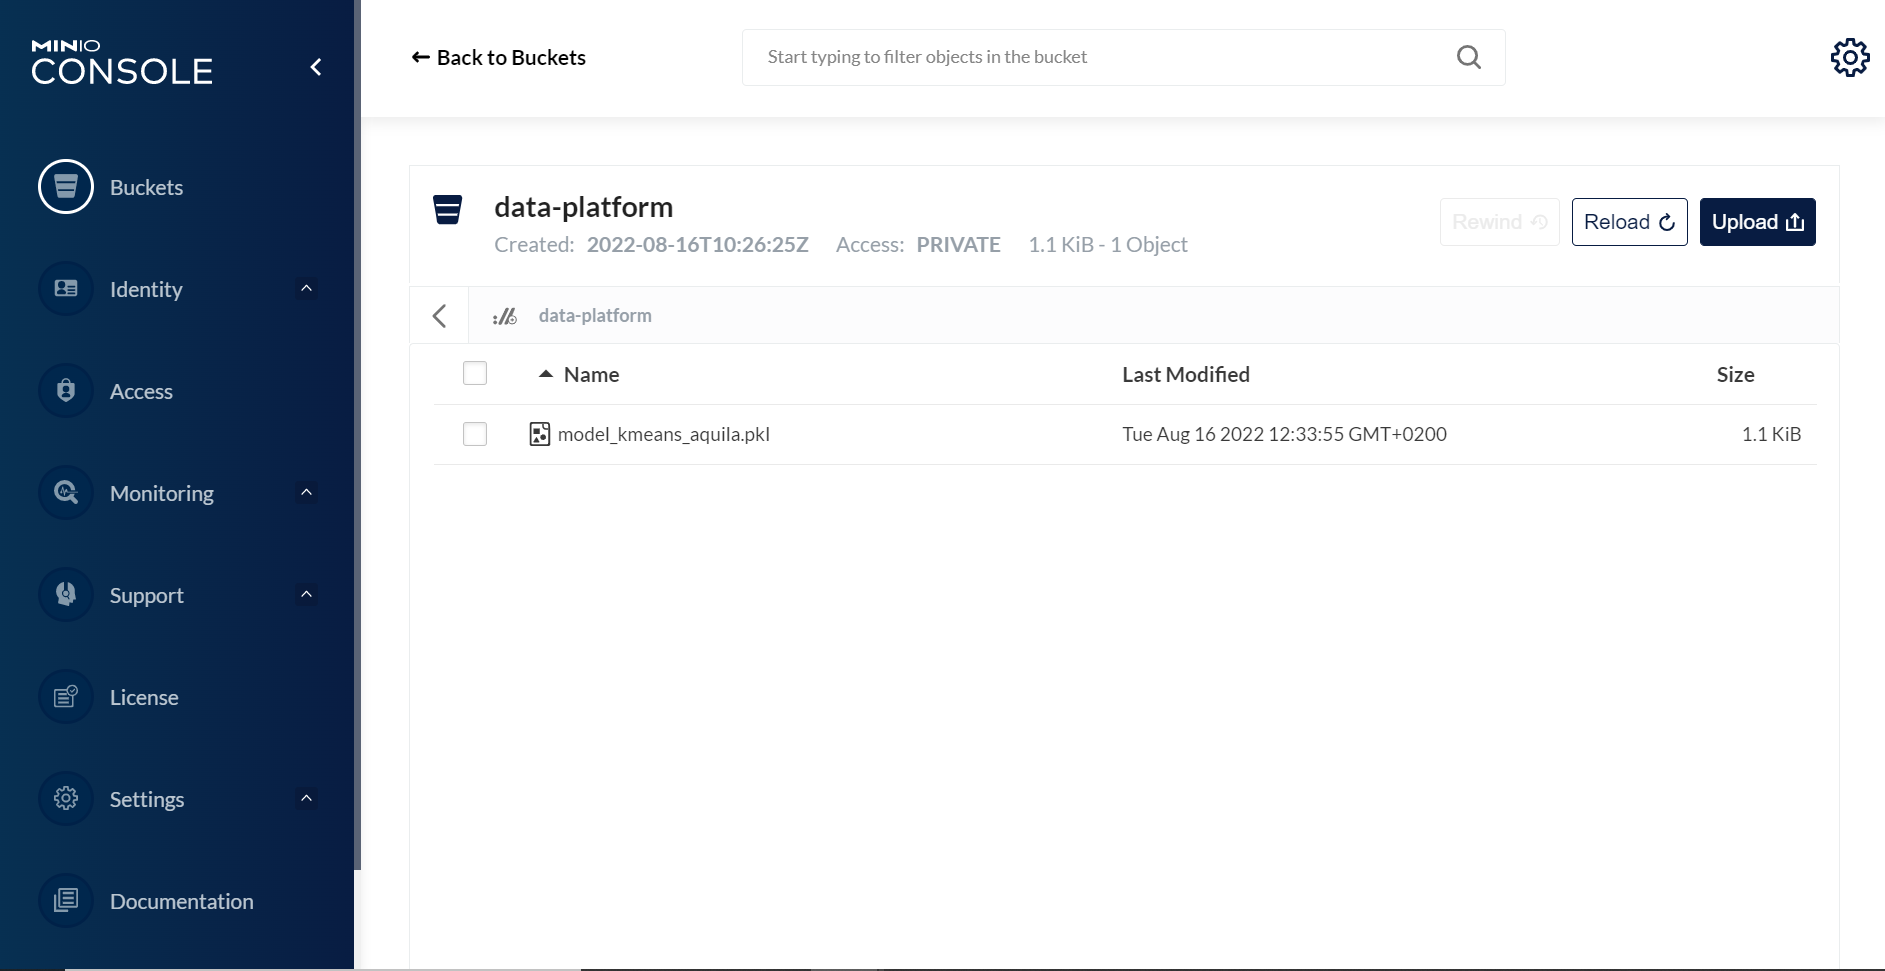

In [90]:
kmeans_model

KMeans(n_clusters=2, random_state=42)

 ### Seldon Core 
 Let's serve our model through seldon core api, and we will use an ingress so we can have access to our model from outside the cluster.

 In my use case, I'll be using minikube cluster to deploy my components

In [ ]:
!kubectl create ns aquila-serving

In [ ]:
%%writefile secret.yaml

apiVersion: v1
kind: Secret
metadata:
  name: seldon-init-container-secret
  namespace: aquila-serving
type: Opaque
stringData:
  RCLONE_CONFIG_S3_TYPE: s3
  RCLONE_CONFIG_S3_PROVIDER: minio
  RCLONE_CONFIG_S3_ACCESS_KEY_ID: *******
  RCLONE_CONFIG_S3_SECRET_ACCESS_KEY: ***********
  RCLONE_CONFIG_S3_ENDPOINT: *********
  RCLONE_CONFIG_S3_ENV_AUTH: "false"

In [ ]:
!kubectl apply -f secret.yaml 

Serving part while creating a SeldonDeployment crd

In [ ]:
%%writefile deploy.yaml
apiVersion: machinelearning.seldon.io/v1
kind: SeldonDeployment
metadata:
  name: minio-sklearn
  namespace: aquila-serving
spec:
  name: aquila
  predictors:
  - componentSpecs:
    graph:
      children: []
      implementation: SKLEARN_SERVER
      modelUri: ************
      envSecretRefName: seldon-init-container-secret
      name: classifier
    name: default
    replicas: 1

In [ ]:
!kubectl apply -f deploy.yaml

Now we have to create an ingress so we can access to our pod outside the cluster and to be able to do some rest api requests

In [ ]:
%%writefile ingress.yaml
apiVersion: networking.k8s.io/v1
kind: Ingress
metadata:
  name: kmeans-model
  namespace: aquila-serving
spec: 
  rules:
  - host: localhost.ma
    http:
      paths:
          - path: /predict
            pathType: Prefix
            backend:
              service:
                name: kmeans-default-classifier
                port:
                  number: 9000   # We choose port 9000 since we will use rest api requets

In [ ]:
!kubectl apply -f ingress.yaml

We approach to the last step, we need to port forward our pod (where we deployed our model), and we can do basic rest api requests

In [ ]:
!kubectl port-forward pods/pod-name desired-port-number:9000

Let's create a simple function to do our predictions

In [ ]:
import json
import requests

In [ ]:
def rest_predict_request(endpoint, data):
    request = {"data": {"ndarray": data.tolist()}}
    response = requests.post(
        "http://" + endpoint + "/predict",
        data={"json": json.dumps(request), "isDefault": True},
    )
    return response.json()

In [ ]:
endpoint = "localhost:desired_port"
# We select a random missing job title so we can predict it
data = df_clust[df_clust['Metier'] == 4].iloc[0]  
result = rest_predict_request(endpoint, data) 


Thank you for taking the time and reading the notebook, I would appreciate any type of remarks and critics.